# Extrair valores dos csvs contendo métricas calculadas

In [137]:
def parse_string(s):
    parts = s.split('_')

    # Find the model (look for the part containing ':')
    model = None
    for i in range(len(parts)):
        if ':' in parts[i]:
            model = parts[i]
            model_start_idx = i
            break

    if "triplas" not in s:
        shot_type = 'Sem Contexto'
        additional_info = 'none'
        topic = "_".join(parts[:model_start_idx-1])
    else:
        if "zero-shot" in s:
            shot_type = 'Zero Shot'
        else:
            shot_type = 'Few Shot'

        if "verbalizado" in s:
            additional_info = 'Verbalizado'
        else:
            additional_info = 'RDF'

        topic = "_".join(parts[:model_start_idx-3])
    
    return [topic, shot_type, additional_info, model]

In [138]:
import pandas as pd
import os

# Define the folder path
folder_path = '/Users/gabrielleite/Backup/QA-Promp-KG/qa-prompt-kg/metrics/full_metrics.csv'

# Read the CSV file
df = pd.read_csv(folder_path)

In [139]:
# Use parse_string from cell 1 to extract new columns from 'Configuração'
df[['Tópico', 'Contexto', 'Tripla', 'Modelo']] = df['Configuração'].apply(lambda x: pd.Series(parse_string(x)))

# Reorganize as colunas: coloque as novas no início e remova 'Configuração'
cols = ['Tópico', 'Contexto', 'Tripla', 'Modelo'] + [col for col in df.columns if col not in ['Tópico', 'Contexto', 'Tripla', 'Modelo', 'Configuração']]
df = df[cols]

# Display the first few rows of the DataFrame
df.head()

,Tópico,Contexto,Tripla,Modelo,Pergunta,Resposta,Complexidade,Completude,Corretude,Fluência,...,Média de Avaliação,Justificativa,Q_yngve,Q_brunet,Q_ttr,Q_simple_word_ratio,A_yngve,A_brunet,A_ttr,A_simple_word_ratio
0,Normandos,Sem Contexto,none,deepseek-r1:1.5b,Quais são os origemadores dos Normandos?,Os Normandos foram origernados nos paíseslatin...,2,1,1,3,...,1.8,"A pergunta é simples e factual, mas a resposta...",1.71429,3.79304,1.00000,0.333,1.81818,4.82961,1.00000,0.00
1,Normandos,Sem Contexto,none,deepseek-r1:1.5b,Quão escrita historically linkou a Normandia a...,A Normandia é considerada a principalidade que...,2,1,2,2,...,2.0,A pergunta exige um entendimento mínimo sobre ...,2.53846,5.20226,1.00000,0.375,2.31250,5.77882,0.76923,0.25
2,Normandos,Sem Contexto,none,deepseek-r1:1.5b,Por que foram essenciais ganhar a contata com ...,Estes jogadores te horizonizonte marcaram a tr...,3,2,3,2,...,2.4,"A pergunta exige compreensão de contexto, mas ...",2.25000,5.65316,1.00000,0.143,2.15385,5.20226,1.00000,0.00
3,Normandos,Sem Contexto,none,deepseek-r1:1.5b,"Com que sport, em geral, linkou os Normandos c...",O esporto dos ballastes foi importante para th...,2,1,2,3,...,2.0,"A pergunta é simples e direta, mas a resposta ...",2.35714,5.15490,0.90909,0.500,2.35714,5.36491,1.00000,0.20
4,Normandos,Sem Contexto,none,deepseek-r1:1.5b,Em quais regiões eram os normandos considerado...,Normandos foram considerados backwards em vári...,2,2,3,4,...,3.0,A pergunta é simples e exige compreensão mínim...,2.92857,5.36491,1.00000,0.000,2.64706,5.76639,0.93333,0.10


In [140]:
len(df)

31617

# Tabelas

In [141]:
numerical_cols = df.describe().columns
# Display the numerical columns
total = df[numerical_cols].mean()

In [142]:
metrics_judge = ['Complexidade', 'Completude', 'Corretude', 'Fluência',
       'Qualidade do Português', 'Média de Avaliação']
nilcmetrix = ["Q_yngve","Q_brunet","Q_ttr","Q_simple_word_ratio","A_yngve","A_brunet","A_ttr","A_simple_word_ratio"]

## Tabela de contexto

In [143]:
sort_by_context = df.groupby('Contexto')[numerical_cols].mean()
sort_by_context.loc["Total"] = total
sort_by_context.index.name = None  # Remove the index name
round(sort_by_context[metrics_judge],3)

,Complexidade,Completude,Corretude,Fluência,Qualidade do Português,Média de Avaliação
Few Shot,2.586,3.748,4.355,4.186,4.435,3.862
Sem Contexto,2.450,3.500,4.119,4.033,4.273,3.675
Zero Shot,2.460,3.631,4.289,4.152,4.333,3.773
Total,2.509,3.652,4.282,4.142,4.362,3.789


In [144]:
round(sort_by_context[nilcmetrix],3)

,Q_yngve,Q_brunet,Q_ttr,Q_simple_word_ratio,A_yngve,A_brunet,A_ttr,A_simple_word_ratio
Few Shot,2.262,4.865,0.977,0.356,1.248,3.052,0.976,0.183
Sem Contexto,2.214,4.813,0.977,0.374,1.588,3.872,0.969,0.221
Zero Shot,2.309,4.856,0.979,0.317,1.687,3.724,0.965,0.147
Total,2.271,4.851,0.978,0.344,1.491,3.482,0.971,0.176


## Tabela de Triplas

In [145]:
sort_by_triple = df.groupby('Tripla')[numerical_cols].mean()
sort_by_triple.loc["Total"] = total
sort_by_triple.index.name = None  # Remove the index name
round(sort_by_triple[metrics_judge],3)

,Complexidade,Completude,Corretude,Fluência,Qualidade do Português,Média de Avaliação
RDF,2.550,3.705,4.327,4.163,4.365,3.822
Verbalizado,2.497,3.674,4.317,4.175,4.403,3.813
none,2.450,3.500,4.119,4.033,4.273,3.675
Total,2.509,3.652,4.282,4.142,4.362,3.789


In [146]:
round(sort_by_triple[nilcmetrix],3)

,Q_yngve,Q_brunet,Q_ttr,Q_simple_word_ratio,A_yngve,A_brunet,A_ttr,A_simple_word_ratio
RDF,2.292,4.853,0.978,0.331,1.660,3.698,0.965,0.181
Verbalizado,2.280,4.869,0.978,0.342,1.275,3.077,0.977,0.148
none,2.214,4.813,0.977,0.374,1.588,3.872,0.969,0.221
Total,2.271,4.851,0.978,0.344,1.491,3.482,0.971,0.176


## Tabela de Modelos

In [147]:
def get_model_family(model):
    if "deepseek" in model:
        return "DeepSeek"
    elif "gemma" in model:
        return "Gemma"
    elif "granite" in model:
        return "Mistral"
    elif "phi" in model:
        return "Phi"
    elif "qwen" in model:
        return "Qwen"

In [148]:
sort_by_model = df.groupby('Modelo')[numerical_cols].mean()
sort_by_model.loc["Total"] = total
sort_by_model.index.name = None  # Remove the index name
aux = round(sort_by_model[metrics_judge],3)

In [149]:
# Create a copy of aux with model families
model_families = {}
for model in aux.index:
    if model != "Total":  # Skip the Total row
        family = get_model_family(model)
        model_families[model] = family

# Group by model family and calculate means
family_data = {}
for model, family in model_families.items():
    if family not in family_data:
        family_data[family] = []
    family_data[family].append(aux.loc[model])

# Calculate means for each family
family_means = {}
for family, data_list in family_data.items():
    family_df = pd.DataFrame(data_list)
    family_means[family] = family_df.mean()

# Create new dataframe with family averages
family_aux = pd.DataFrame(family_means).T.sort_values('Média de Avaliação', ascending=False)
family_aux.loc["Total"] = total[metrics_judge]
family_aux = round(family_aux, 3)
family_aux

,Complexidade,Completude,Corretude,Fluência,Qualidade do Português,Média de Avaliação
Phi,2.584,3.874,4.487,4.215,4.478,3.928
Qwen,2.522,3.807,4.438,4.228,4.495,3.898
Gemma,2.484,3.685,4.389,4.210,4.478,3.849
Mistral,2.561,3.725,4.327,4.172,4.444,3.846
DeepSeek,2.471,3.297,3.885,3.924,4.016,3.519
Total,2.509,3.652,4.282,4.142,4.362,3.789


In [150]:
round(sort_by_model[metrics_judge].sort_values('Média de Avaliação', ascending=False),3)

,Complexidade,Completude,Corretude,Fluência,Qualidade do Português,Média de Avaliação
qwen3:32b,2.532,4.040,4.602,4.305,4.586,4.013
qwen3:14b,2.565,3.942,4.551,4.271,4.535,3.973
qwen3:8b,2.562,3.843,4.498,4.265,4.533,3.940
gemma3:27b,2.483,3.904,4.543,4.237,4.506,3.935
phi4:14b,2.584,3.874,4.487,4.215,4.478,3.928
qwen3:30b,2.517,3.820,4.497,4.241,4.527,3.921
deepseek-r1:32b,2.556,3.841,4.492,4.257,4.427,3.914
qwen2.5:14b,2.525,3.851,4.461,4.205,4.501,3.909
qwen2.5:32b,2.461,3.817,4.458,4.233,4.505,3.895
qwen3:4b,2.536,3.766,4.425,4.225,4.473,3.885


In [151]:
aux = round(sort_by_model[nilcmetrix],3)
aux

,Q_yngve,Q_brunet,Q_ttr,Q_simple_word_ratio,A_yngve,A_brunet,A_ttr,A_simple_word_ratio
deepseek-r1:1.5b,2.475,4.931,0.975,0.248,2.009,4.206,0.960,0.180
deepseek-r1:14b,2.310,4.623,0.983,0.306,1.471,3.237,0.980,0.144
deepseek-r1:32b,2.243,4.581,0.985,0.290,1.525,3.329,0.977,0.154
deepseek-r1:7b,2.283,5.007,0.975,0.299,1.743,3.891,0.962,0.177
deepseek-r1:8b,2.255,4.761,0.981,0.348,1.936,4.228,0.967,0.224
gemma3:12b,2.290,4.857,0.967,0.384,1.401,3.252,0.972,0.181
gemma3:27b,2.268,4.862,0.973,0.376,1.201,2.880,0.977,0.158
gemma3:4b,2.262,4.915,0.966,0.419,1.259,3.198,0.973,0.207
granite3.1-dense:8b,2.236,4.854,0.980,0.348,1.722,4.231,0.952,0.198
phi4:14b,2.355,5.102,0.982,0.335,1.460,3.459,0.971,0.161


In [152]:
# Create a copy of aux with model families
model_families = {}
for model in aux.index:
    if model != "Total":  # Skip the Total row
        family = get_model_family(model)
        model_families[model] = family

# Group by model family and calculate means
family_data = {}
for model, family in model_families.items():
    if family not in family_data:
        family_data[family] = []
    family_data[family].append(aux.loc[model])

# Calculate means for each family
family_means = {}
for family, data_list in family_data.items():
    family_df = pd.DataFrame(data_list)
    family_means[family] = family_df.mean()

# Create new dataframe with family averages
family_aux = pd.DataFrame(family_means).T
family_aux.loc["Total"] = total[nilcmetrix]
family_aux = round(family_aux, 3)
family_aux

,Q_yngve,Q_brunet,Q_ttr,Q_simple_word_ratio,A_yngve,A_brunet,A_ttr,A_simple_word_ratio
DeepSeek,2.313,4.781,0.980,0.298,1.737,3.778,0.969,0.176
Gemma,2.273,4.878,0.969,0.393,1.287,3.110,0.974,0.182
Mistral,2.236,4.854,0.980,0.348,1.722,4.231,0.952,0.198
Phi,2.355,5.102,0.982,0.335,1.460,3.459,0.971,0.161
Qwen,2.241,4.855,0.979,0.354,1.391,3.349,0.973,0.173
Total,2.271,4.851,0.978,0.344,1.491,3.482,0.971,0.176


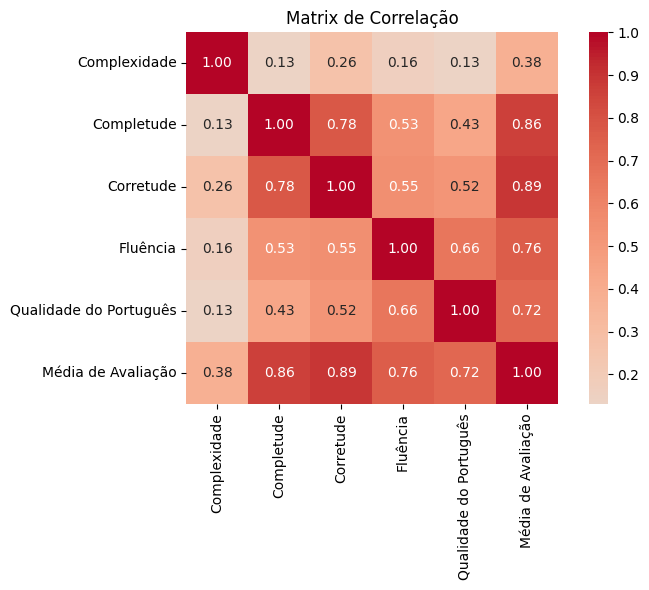

In [153]:
import seaborn as sns

import matplotlib.pyplot as plt

# Create correlation matrix
correlation_matrix = df[metrics_judge].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f')
plt.title('Matrix de Correlação')
plt.tight_layout()
plt.show()

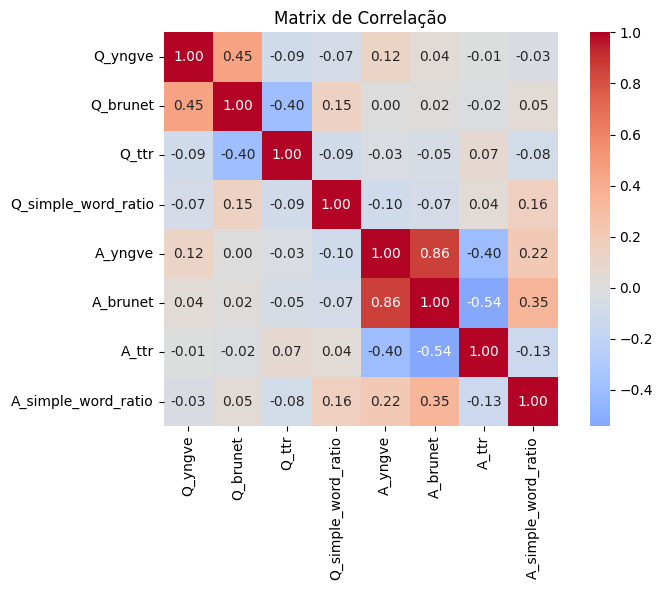

In [154]:
full_data_named = df[nilcmetrix].rename(columns={
    'Q-simple-word-ratio': 'Q-swr',
    'A-simple-word-ratio': 'A-swr'
})

# Create correlation matrix
correlation_matrix = full_data_named.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f')
plt.title('Matrix de Correlação')
plt.tight_layout()
plt.show()

In [155]:
top = df[(df["Modelo"]=="qwen3:32b") & (df["Tripla"]=="RDF") & (df["Contexto"]=="Few Shot")].sort_values('Média de Avaliação', ascending=False)

In [156]:
top.loc[25001]

Tópico                                                         Número_primo
Contexto                                                           Few Shot
Tripla                                                                  RDF
Modelo                                                            qwen3:32b
Pergunta                        Por que o número 1 não é considerado primo?
Resposta                  Para preservar a unicidade da fatoração em núm...
Complexidade                                                              4
Completude                                                                5
Corretude                                                                 5
Fluência                                                                  5
Qualidade do Português                                                    5
Média de Avaliação                                                      4.8
Justificativa             A pergunta exige uma compreensão conceitual so...
Q_yngve     

In [157]:
bottom = df[(df["Modelo"]=="deepseek-r1:1.5b") & (df["Tripla"]=="none") & (df["Contexto"]=="Sem Contexto")].sort_values('Média de Avaliação', ascending=True)

In [158]:
bottom.head()

,Tópico,Contexto,Tripla,Modelo,Pergunta,Resposta,Complexidade,Completude,Corretude,Fluência,...,Média de Avaliação,Justificativa,Q_yngve,Q_brunet,Q_ttr,Q_simple_word_ratio,A_yngve,A_brunet,A_ttr,A_simple_word_ratio
11814,Comutação_de_pacotes,Sem Contexto,none,deepseek-r1:1.5b,¿Qué herramientas teomejadas son últiles para ...,"Vibrantes, sonidos, tarjetas de pimienta y taz...",1,1,1,1,...,1.0,A pergunta e a resposta apresentam erros signi...,2.69231,5.02467,1.00000,0.20,2.11765,5.76263,0.85714,0.100
17287,Escola,Sem Contexto,none,deepseek-r1:1.5b,Tiger: Quem deroga da geração europea?,Origin from Greek hieppotámos.,2,1,1,1,...,1.2,A pergunta é simples e parece referir-se a uma...,1.75000,3.79304,1.00000,0.20,1.60000,3.01273,1.00000,0.000
10003,Ctenophora,Sem Contexto,none,deepseek-r1:1.5b,O que você pode concluir sobre o uso de ctorno...,Doctorns são usados em pacos como boavos e can...,1,1,1,2,...,1.2,A pergunta e a resposta apresentam termos inco...,1.72727,4.96484,0.90000,0.50,2.33333,6.50743,0.90476,0.200
14531,Farmácia,Sem Contexto,none,deepseek-r1:1.5b,Quantas linhas de prod LOOPação habilitadas em...,10,1,1,2,1,...,1.2,A pergunta contém erros de ortografia e não fa...,2.68421,6.35243,0.83333,0.20,0.00000,1.00000,1.00000,0.000
9998,Ctenophora,Sem Contexto,none,deepseek-r1:1.5b,O que você consegue determinar sobre a vida-lo...,As ctornornas têm uma life-span finita. De vez...,1,1,1,2,...,1.2,A pergunta parece ser sobre a longevidade das ...,1.72727,4.82961,1.00000,0.25,2.23214,6.74206,0.91667,0.167
